In [1]:
import os
import sys
sys.path.append('/opt/homebrew/lib/python3.8/site-packages')
import utils.plot_utils as plot_utils
import data_cleaner
import data_reader
import utils.print_utils as print_utils
import pandas as pd
import matplotlib.pyplot as plt  # plotting


In [2]:
steam_200k = data_cleaner.clean_data(data_reader.read_data_into_data_frame('./data/data.csv', 'steam_200k'))
print_utils.print_row_and_col_count(steam_200k)

Removing 707 duplicated rows
There are 199292 rows and 4 columns


In [3]:
steam = data_cleaner.clean_data(data_reader.read_data_into_data_frame('./data/steam.csv', 'steam'))
print_utils.print_row_and_col_count(steam)

Removing 0 duplicated rows
There are 27075 rows and 18 columns


In [4]:
steam_200k = steam_200k.loc[steam_200k['behavior'] != 'purchase']

In [5]:
data_frame = steam_200k.merge(steam, left_on='game_title', right_on='name')
data_frame = data_frame.drop(columns=['behavior', 'name', 'average_playtime', 'appid', 'english', 'steamspy_tags', 'achievements', 'positive_ratings', 'negative_ratings', 'median_playtime', 'owners'])

In [6]:
avg_playtime = data_frame.groupby('game_title')['hours_played'].mean()
data_frame['avg_play_time'] = data_frame.apply(lambda x: avg_playtime[x['game_title']], axis=1)
data_frame['avg_play_time'] = data_frame['avg_play_time'].round()
data_frame = data_frame[data_frame['avg_play_time'] != 0]

In [7]:
data_frame['rating'] = data_frame.apply(lambda x: (x['hours_played'] / x['avg_play_time']) * 10, axis=1)
data_frame['rating'] = data_frame.apply(lambda x: 0 if x['rating'] < 0 else x['rating'], axis=1)
data_frame['rating'] = data_frame.apply(lambda x: 10 if x['rating'] > 10 else x['rating'], axis=1)

In [8]:
cleaned_data = data_frame.to_csv('./data/cleaned_data.csv', index=False)
data_frame

user_id             game_title  hours_played release_date  \
0      151603712              Fallout 4          87.0   2015-11-09   
1       87445402              Fallout 4          83.0   2015-11-09   
2       25096601              Fallout 4           1.6   2015-11-09   
3      211925330              Fallout 4         133.0   2015-11-09   
4      115396529              Fallout 4          17.9   2015-11-09   
...          ...                    ...           ...          ...   
36295  154230723               Khet 2.0           1.9   2014-10-01   
36297  116564064  SAMURAI WARRIORS 4-II           2.2   2015-09-29   
36299  135400225           Life is Hard           3.1   2015-11-03   
36300  135400225      Executive Assault           2.7   2015-07-17   
36301  135400225          MirrorMoon EP           0.6   2013-09-04   

                              developer                   publisher  \
0                 Bethesda Game Studios          Bethesda Softworks   
1                 Bethesda Game Studios          Bethesda Softworks   
2                 Bethesda Game Studios          Bethesda Softworks   
3                 Bethesda Game Studios          Bethesda Softworks   
4                 Bethesda Game Studios          Bethesda Softworks   
...                                 ...                         ...   
36295                    BlueLine Games              BlueLine Games   
36297        KOEI TECMO GAMES CO., LTD.  KOEI TECMO GAMES CO., LTD.   
36299  Pirozhok Studio;Vitaliy Ruzankin             Pirozhok Studio   
36300               Hesketh Studios Ltd         Hesketh Studios Ltd   
36301                     Santa Ragione               Santa Ragione   

               platforms  required_age  \
0                windows            18   
1                windows            18   
2                windows            18   
3                windows            18   
4                windows            18   
...                  ...           ...   
36295  windows;mac;linux             0   
36297            windows             0   
36299  windows;mac;linux             0   
36300            windows             0   
36301  windows;mac;linux             0   

                                              categories  \
0      Single-player;Steam Achievements;Full controll...   
1      Single-player;Steam Achievements;Full controll...   
2      Single-player;Steam Achievements;Full controll...   
3      Single-player;Steam Achievements;Full controll...   
4      Single-player;Steam Achievements;Full controll...   
...                                                  ...   
36295  Single-player;Multi-player;Cross-Platform Mult...   
36297  Single-player;Multi-player;Co-op;Steam Achieve...   
36299  Single-player;Steam Achievements;Steam Trading...   
36300                   Single-player;Multi-player;Co-op   
36301  Single-player;Co-op;Cross-Platform Multiplayer...   

                                                 genres  price  avg_play_time  \
0                                                   RPG  19.99           64.0   
1                                                   RPG  19.99           64.0   
2                                                   RPG  19.99           64.0   
3                                                   RPG  19.99           64.0   
4                                                   RPG  19.99           64.0   
...                                                 ...    ...            ...   
36295                             Casual;Indie;Strategy   6.99            2.0   
36297                                            Action  39.99            2.0   
36299  Adventure;Indie;Simulation;Strategy;Early Access   5.99            3.0   
36300                                   Action;Strategy  10.29            3.0   
36301                                   Adventure;Indie  10.99            1.0   

          rating  
0      10.000000  
1      10.000000  
2       0.250000  
3      10.000000  
4       2.796875  
..

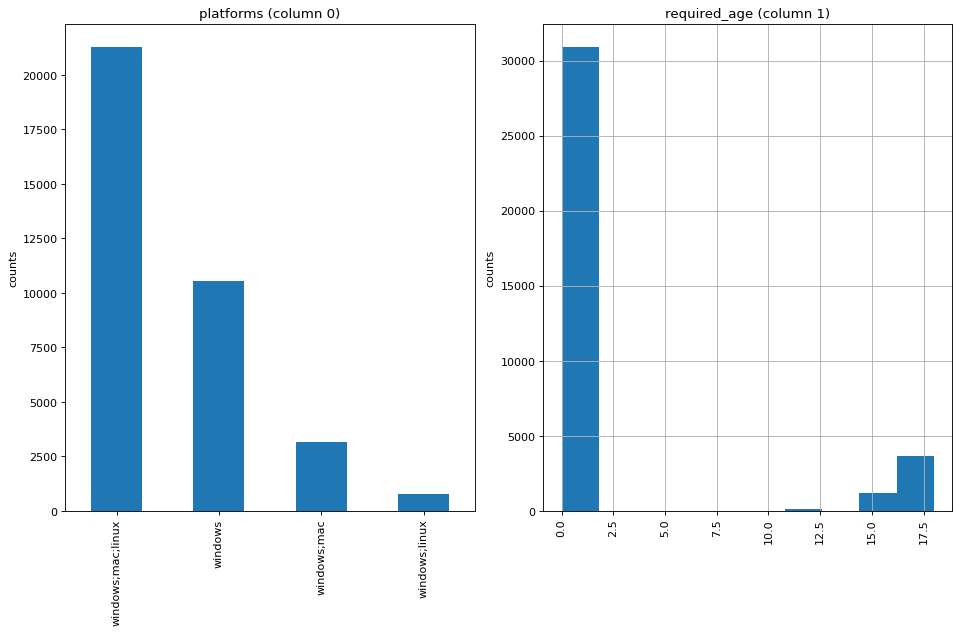

In [9]:
plot_utils.plotPerColumnDistribution(data_frame, 10, 5)

In [10]:
data_frame.nunique()

user_id          9234
game_title       1481
hours_played     1315
release_date      945
developer        1175
publisher         903
platforms           4
required_age        4
categories        575
genres            264
price              85
avg_play_time      90
rating           4138
dtype: int64

In [11]:
top_20_games_by_avg_play_time = data_frame.groupby('game_title')['avg_play_time'].mean().sort_values(ascending=False).head(20).reset_index()
top_20_games_by_avg_play_time

game_title  avg_play_time
0        Eastside Hockey Manager         1295.0
1                      Perpetuum          401.0
2              Freaking Meatbags          331.0
3                 Counter-Strike          236.0
4                      Avernum 4          228.0
5                      Avernum 5          222.0
6                         Dota 2          203.0
7          Europa Universalis IV          195.0
8           Cultures - Northland          194.0
9        Uncharted Waters Online          181.0
10      Pro Cycling Manager 2014          178.0
11                Imperial Glory          170.0
12                   Prime World          169.0
13                       Empires          156.0
14                        Arma 3          153.0
15  The Treasures of Montezuma 4          139.0
16              Sigils of Elohim          127.0
17             Crusader Kings II          119.0
18                   Bard's Gold          119.0
19               Shattered Union          116.0

<AxesSubplot: xlabel='game_title'>

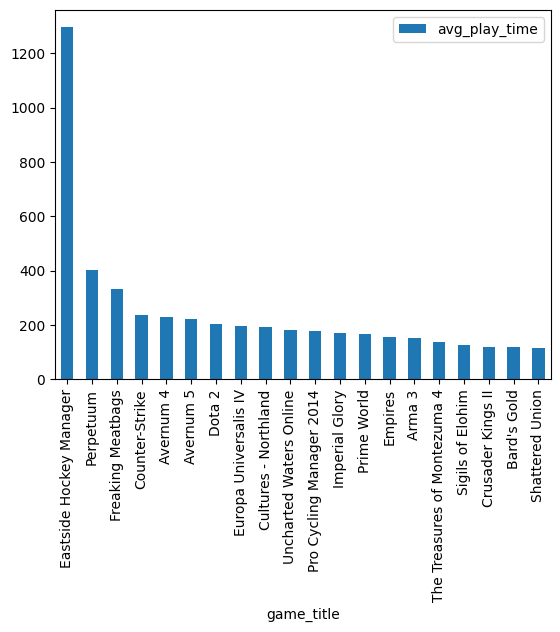

In [12]:
top_20_games_by_avg_play_time.plot(kind='bar', x='game_title', y='avg_play_time')

In [13]:
# get the top 20 games based on the number of user_id values
games_by_user_count = data_frame['game_title'].value_counts().reset_index()

games_by_user_count.columns = ['game_title', 'count']
games_by_user_count

game_title  count
0                      Dota 2   4841
1             Team Fortress 2   2323
2                    Unturned   1069
3               Left 4 Dead 2    801
4                 Garry's Mod    666
...                       ...    ...
1476  An Assassin in Orlandes      1
1477              Lumino City      1
1478   Airport Simulator 2014      1
1479       Castle of Illusion      1
1480            MirrorMoon EP      1

[1481 rows x 2 columns]